In [2]:
%load_ext autoreload
%autoreload 2
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import pandas as pd
import os
import sys
import numpy as np
sys.path.append("../../Code")
import utils
import files as f
import seaborn as sns
import matplotlib.pyplot as plt
import preprocessing as pre
import languages as lang
stopWords = set(stopwords.words('english'))
import profiles

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Get Translated Profiles 

In [3]:
# Merge Data - done
# Get Vocabulary - Done
# Get Unknown Words 
# Get Distribution - unknown words - done 
# Get Correction dictionary - done
# Manually Correct  - done 
# Correction Dictionary - done 
# Go Through All Reviews Correct - Translated Marker  + Spelling Corrected Marker - done

In [13]:
guests = pd.read_csv(os.path.join('..','2','nr_restrict_guests.csv'), low_memory=False, index_col=0)
hosts = pd.read_csv(os.path.join('..','2','nr_restrict_hosts.csv'), low_memory=False, index_col=0)

In [20]:
trans_guest = pd.read_csv('translated_guest_profiles.csv', index_col=0)

In [21]:
trans_host = pd.read_csv('translated_host_profiles.csv', index_col=0)

In [28]:
pd.options.display.max_colwidth = 400

## Setting Length

### Hosts 

In [67]:
lang_hosts = hosts.join(trans_host[['id', 'google_langs', 'google_langs_conf']].set_index('id'), on='id')

In [68]:
lang_hosts.google_langs = lang_hosts.google_langs.fillna('unk')

In [69]:
lang_hosts.google_langs_conf = lang_hosts['google_langs_conf'].fillna(0.0)

In [70]:
lang_hosts['about'] = lang_hosts['about'].map(lambda x: x.replace("\r\n", " ").replace("\n", " ").replace("\r", " ") if x not in [np.nan, None] else None)

In [71]:
lang_hosts['token_len'] = [lang.get_token_len(t) for t in lang_hosts['about']]

In [72]:
lang_hosts[lang_hosts.google_langs == 'unk'].head()

,id,name,since,location,about,response_time,response_rate,is_superhost,neighbourhood,listings_count,total_listings_count,verifications,has_profile_pic,identity_verified,calculated_listings_count,num_of_cancellations,google_langs,google_langs_conf,token_len
62,157798,Irene,04/07/2010,"New York, New York, United States",None,a few days or more,25%,f,East Harlem,1,1,"['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']",t,f,1,1,unk,0.0,0
121,315396,Daniel,10/12/2010,"Haiku-Pauwela, Hawaii, United States",None,within a few hours,100%,f,Alphabet City,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,1,0,unk,0.0,0
133,342054,Violetta,10/01/2011,"New York, New York, United States",None,within a day,100%,f,Upper West Side,1,1,"['email', 'phone', 'reviews']",t,f,1,1,unk,0.0,0
154,526172,Chris,21/04/2011,"New York, New York, United States",None,within an hour,100%,t,Upper West Side,1,1,"['email', 'phone', 'reviews']",t,f,1,1,unk,0.0,0
184,299755,Jonathan,26/11/2010,"New York, New York, United States",None,NaN,NaN,f,Alphabet City,1,1,"['email', 'phone', 'facebook', 'reviews', 'jumio']",t,t,1,0,unk,0.0,0


In [88]:
lang_hosts[(lang_hosts.google_langs != 'en') & (lang_hosts.google_langs != 'unk')]

,id,name,since,location,about,response_time,response_rate,is_superhost,neighbourhood,listings_count,total_listings_count,verifications,has_profile_pic,identity_verified,calculated_listings_count,num_of_cancellations,google_langs,google_langs_conf,token_len
881,4318273,Mel,04/12/2012,"New York, New York, United States",na,within an hour,83%,f,West Village,1,1,"['email', 'phone', 'reviews', 'jumio', 'work_email']",t,t,1,3,bg,0.226923,1
1006,17806019,Yahweh,08/07/2014,"New York, New York, United States",Hi I am fun. Ny'er of 22 years. Expert.,within a few hours,91%,f,Noho,1,1,"['email', 'phone', 'reviews', 'manual_offline', 'jumio']",t,t,1,8,noen,0.471959,9
1414,9309315,Vanessa,08/10/2013,"New York, New York, United States",na,NaN,NaN,f,Upper West Side,1,1,"['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']",t,t,1,1,bg,0.226923,1
1538,2301618,Monica,06/05/2012,"Mexico City, Mexico City, Mexico","I'm a documentary filmmaker/video journalist and travel a lot for work. I'm Colombian American and speak Spanish (with a weird mixed accent now). I'm based in Mexico City, but rent out my NYC apt long term. I love animals and getting to know new places and cultures. Hola! Soy periodista, cineasta, feminista, viajera, activista, lesbiana, Colombiana y Norteamericana. :) En estos meses voy a e...",within a day,100%,f,NaN,1,1,"['email', 'phone', 'reviews', 'jumio', 'government_id']",t,t,1,2,enes,0.517945,82
1540,1321170,Dave,21/10/2011,"New York, New York, United States","From NY, NY",within a few hours,92%,f,Lower East Side,1,1,"['email', 'phone', 'reviews', 'jumio', 'government_id', 'work_email']",t,f,1,10,mg,1.000000,3
1590,10351373,Amir,30/11/2013,"New York, New York, United States",Hi! I'm Amir!,within an hour,100%,f,West Village,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,1,1,ca,0.872401,3
1915,8873749,Fany,16/09/2013,"New York, New York, United States",I like to travel and shop especially with discount and coupounds. I like to read and listen to music. I live in the city that never sleeps and it will be such a great experience to stay a night in uptown Manhattan. I am a hard worker with 2 jobs but if I find myself avaliable during your stay I am willing to show you the beauty of New York City! Me gusta mucho (Website hidden by Airbnb) gusta...,within an hour,100%,t,NaN,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,1,0,es,0.878891,153
2080,10441017,Katherine,04/12/2013,"New York, New York, United States",Oi!,within an hour,100%,f,Lower East Side,1,1,"['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'government_id']",t,t,1,0,el,0.878906,1
2246,2819262,Sarah,03/07/2012,"New York, New York, United States","Not all those who wander are lost. - JRR Tolkien 33-year-old, female, Detroit area native. Extensive travel experience around the world - particularly in LatAm - sometimes in rough conditions. Spanish/English/French. Clean and neat, respectful, responsible adult. Ideal guest and 5-star airbnb host. No smoking, pets, or drugs. I don't bring the party home. I only host when I'm away, and...",NaN,NaN,f,Midtown East,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,1,0,enfr,0.601461,112
2257,16316786,Nico,03/06/2014,"New York, New York, United States",French Expat living in NYC. 日本の興味があるフランス人です。 日本語でどうぞ。,within a day,100%,t,Chinatown,1,1,"['email', 'phone', 'reviews', 'jumio', 'government_id']",t,t,1,0,ja,1.000000,7


In [89]:
needs_translation_hosts = lang_hosts[((lang_hosts.google_langs_conf.astype(float) < 1.0) & (lang_hosts.google_langs == 'en') & (lang_hosts.token_len > 5)) | ((lang_hosts.google_langs != 'en') & (lang_hosts.google_langs != 'unk'))]

In [90]:
len(needs_translation_hosts)

54

## Guests

In [91]:
lang_guests = guests.join(trans_guest[['id', 'google_langs', 'google_langs_conf']].set_index('id'), on='id')

In [92]:
lang_guests.google_langs = lang_guests.google_langs.fillna('unk')

In [93]:
lang_guests.google_langs_conf = lang_guests['google_langs_conf'].fillna(0.0)

In [94]:
lang_guests['description'] = lang_guests['description'].map(lambda x: x.replace("\r\n", " ").replace("\n", " ").replace("\r", " ") if x not in [np.nan, None] else None)

In [95]:
lang_guests['token_len'] = [lang.get_token_len(t) for t in lang_guests['description']]

In [96]:
lang_guests[lang_guests.google_langs == 'unk']

,idGuest,id,name,city,ccode,membershipMonth,membershipYear,superhost,verified,description,linkedAccountVerified,schoolInfo,jobInfo,languages,reviewNumber,guideNumber,wishListNumber,google_langs,google_langs_conf,token_len
0,1,90588613,Kathrin,"Frankfurt, Germany",DE,August,2016,false,false,None,"['Email address', 'Telephone number', 'Facebook']",Hans,null,null,2.0,0.0,0.0,unk,0.0,0
3,4,7370735,Sarah,"Emeryville, California, United States",US,July,2013,false,true,None,"['Official Identity Document', 'Email address', 'Telephone number', 'Business email', 'Facebook', 'Wish List']",Deer,null,null,8.0,0.0,9.0,unk,0.0,0
5,6,137748095,Philippe,"Maisons-Alfort, France",FR,June,2017,false,true,None,"['Official Identity Document', 'selfies', 'Email address', 'Telephone number']",null,null,null,7.0,0.0,0.0,unk,0.0,0
9,10,142388232,Regula Und Martin,"Zollikon, Switzerland",CH,July,2017,false,false,None,"['Email address', 'Telephone number', 'Facebook']",ETH,null,null,1.0,0.0,0.0,unk,0.0,0
10,11,84345760,Hernan,"Ramos Mejía, Argentina",AR,July,2016,false,false,None,"['Email address', 'Telephone number']",Taller,(Website,null,2.0,0.0,0.0,unk,0.0,0
11,12,19349794,Ivan,"New York, New York, United States",US,August,2014,false,true,None,"['Official Identity Document', 'Email address', 'Telephone number', 'Wish List']",null,null,null,3.0,0.0,1.0,unk,0.0,0
13,14,68410138,Ashley,"Jackson, Mississippi, United States",US,April,2016,false,true,None,"['Official Identity Document', 'Email address', 'Telephone number', 'Facebook', 'Wish List']",Jackson,null,null,6.0,0.0,1.0,unk,0.0,0
15,16,3882943,Tiffany,"Oakland, California, United States",US,October,2012,false,true,None,"['Official Identity Document', 'Email address', 'Telephone number', 'Facebook', 'Wish List']",Academy,null,null,2.0,0.0,8.0,unk,0.0,0
16,17,102742551,Margarita,"Palm Bay, Florida, United States",US,November,2016,false,false,None,"['Email address', 'Telephone number', 'Facebook']",University,null,null,3.0,0.0,0.0,unk,0.0,0
20,21,63547361,Michael,"Albuquerque, New Mexico, United States",US,March,2016,false,true,None,"['Official Identity Document', 'selfies', 'Email address', 'Telephone number']",null,null,null,1.0,0.0,0.0,unk,0.0,0


In [97]:
lang_guests[(lang_guests.google_langs != 'en') & (lang_guests.google_langs != 'unk')]

,idGuest,id,name,city,ccode,membershipMonth,membershipYear,superhost,verified,description,linkedAccountVerified,schoolInfo,jobInfo,languages,reviewNumber,guideNumber,wishListNumber,google_langs,google_langs_conf,token_len
44,45,4860807,Alessandro,"Milan, Italy",IT,January,2013,false,true,Alessandro sono italiano e vivo a milano,"['Official Identity Document', 'Email address', 'Telephone number', 'Wish List']",null,null,null,11.0,0.0,2.0,it,1.000000,7
83,84,49423903,Orkun,"Istanbul, Turkey",TR,November,2015,false,false,Yeni yerler gormeyi severim.,"['Email address', 'Telephone number', 'Business email', 'Wish List']",null,null,null,2.0,0.0,2.0,tr,1.000000,4
231,232,46566565,Bernardo,"Buenos Aires, Argentina",AR,October,2015,false,true,"Somos un matrimonio de alrededor de 50 años, que habitualmente viajamos con nuestro hijo de 15 años. Casi siempre viajamos por placer, pero yo trabajo todos los días una hora durante mis vacaciones.","['Official Identity Document', 'selfies', 'Email address', 'Telephone number']",null,null,"English,",2.0,0.0,0.0,es,1.000000,33
241,242,3647765,Paolo,"Vicenza, Italy",IT,September,2012,false,true,Amo conoscere persone nuove e viaggiare a volte anche senza una meta. Ho fondato 2 startup in ambito web e adoro il mio lavoro.,"['Official Identity Document', 'Email address', 'Telephone number', 'Business email', 'Facebook', 'Wish List']",null,Yupmedia,"English,",31.0,0.0,4.0,it,1.000000,24
245,246,58838930,Franzi,"Cologne, Germany",DE,February,2016,false,false,"Ich arbeite an der TU Dortmund und habe deswegen nun einen Zweitwohnsitz in Dortmund. Da ich es gemütlich mag, egal wo ich bin, habe ich meine 1-Zimmer Wohnung mit Liebe eingerichtet, um mich besonders wohlzufühlen. Allerdings bin ich nicht immer da und damit die Wohnung nicht leer ist, dachte ich mir es wäre nett diese ab und zu zu vermieten-natürlich mit der Hoffnung, dass ihr euch dort auch...","['Email address', 'Telephone number']",null,null,null,20.0,0.0,0.0,de,1.000000,72
251,252,3457918,Carmela,"Sao Paulo, Brazil",BR,September,2012,false,true,São Paulo - SP,"['Official Identity Document', 'selfies', 'Email address', 'Facebook']",Jacomo,Editora,"English,",1.0,0.0,0.0,pt,1.000000,3
287,288,14289772,Nico,"Sassuolo, Italy",IT,April,2014,false,true,"Sono un giovane ingegnere gestionale di 27 anni, attualmente lavoro come Demand Planner per un'azienda americana di abbigliamento viaggiando tra Milano e New York.","['Official Identity Document', 'selfies', 'Email address', 'Telephone number', 'Business email']",Liceo,"Lavoratore,","English,",3.0,0.0,0.0,it,1.000000,24
392,393,45737037,Jose Antonio,"Federal District, Mexico",MX,October,2015,false,true,Soy una persona agradable y humanitaria.,"['Official Identity Document', 'Email address', 'Telephone number']",null,null,null,9.0,0.0,0.0,es,1.000000,6
452,453,36582401,Willy,"Mexico City, Mexico",MX,June,2015,false,true,Me dedico al marketing y a la consultoría de negocios que combino con la academia. Me gustan los deportes y hacer ejercicio Lo mas importante es mi familia tengo 3 hijos,"['Official Identity Document', 'Email address', 'Telephone number', 'Wish List']",ITESM,The,null,4.0,0.0,2.0,es,1.000000,31
576,577,6389522,Stefania,"Lombardy, Italy",IT,May,2013,false,true,Ciao! Mi chiamo Stefania e vivo in provincia di Milano. Adoro ascoltare musica e amo viaggiare!,"['Official Identity Document', 'Email address', 'Telephone number', 'Facebook', 'Wish List']",ITCG,null,null,4.0,0.0,1.0,it,1.000000,16


In [100]:
lang_guests[(lang_guests.google_langs_conf.astype(float) < 1.0) & (lang_guests.google_langs == 'en') & (lang_guests.token_len > 5)]

,idGuest,id,name,city,ccode,membershipMonth,membershipYear,superhost,verified,description,linkedAccountVerified,schoolInfo,jobInfo,languages,reviewNumber,guideNumber,wishListNumber,google_langs,google_langs_conf,token_len
1189,1192,6464281,Anisa,"Cambridge, Massachusetts, United States",US,May,2013,false,true,An MBA student at MIT Sloan.,"['Official Identity Document', 'selfies', 'Email address', 'Telephone number', 'Facebook', 'Wish List']",Triam,null,"English,",2.0,0.0,1.0,en,0.712950,6
1976,1981,53287286,Christian,"Witten, Germany",DE,January,2016,false,true,- Born 1990 in Germany - Researcher & Doctoral Student at Ruhr-Univeristät Bochum,"['Official Identity Document', 'Email address', 'Telephone number', 'Business email']",Berufskolleg,Research,English,6.0,0.0,0.0,en,0.985415,11
2211,2216,147356601,Supachok,"Marco Island, Florida, United States",US,August,2017,false,true,"Pastry cook, beach lover, Bangkok boy, LGBT.","['Official Identity Document', 'selfies', 'Email address', 'Telephone number', 'Facebook']",Dusit,null,English,1.0,0.0,0.0,en,0.952065,7
2501,2508,162451,Mia,"San Francisco, California, United States",US,July,2010,false,true,"San Francisco, California based technology analyst working for Veolia Environnement.","['Personal informations', 'Email address', 'Telephone number', 'Wish List']",null,null,null,9.0,0.0,2.0,en,0.972866,10
2678,2761,6834969,Shuyu,Taiwan,TW,June,2013,false,true,"I am Sabrina from Tainan. Love traveling, dancing and party. haha","['Personal informations', 'Email address', 'Telephone number', 'Business email', 'Wish List']","聖功女中,",Paera,null,4.0,0.0,1.0,en,0.971097,11
3600,3684,13645905,Justin,"Los Angeles, California, United States",US,March,2014,false,true,ER Nurse who loves to travel :-).,"['Official Identity Document', 'Email address', 'Telephone number', 'Facebook', 'Wish List']",Clearwater,Providence,null,13.0,0.0,2.0,en,0.980762,6
4367,4454,1924053,Yuan,"Lancaster, Pennsylvania, United States",US,March,2012,false,true,"I am a international student at Franklin and Marshall College, PA.","['Official Identity Document', 'Email address', 'Telephone number', 'Business email', 'Facebook']",Franklin,null,null,5.0,0.0,0.0,en,0.919418,11
4815,4903,16559499,Stephen,"Mansfield, United Kingdom",GB,June,2014,false,true,"Looking for adventure and connections wherever I may be in the world. Recently travelled to: Japan Carcassone Krakow Tallinn Oslo Copenhagen Helsinki Stockholm Iceland Paris Amsterdam Los Angeles, CA Phoenix, AZ Denver, CO Kansas City, MO Chicago, IL Cleveland, OH New York, NY","['Official Identity Document', 'Email address', 'Telephone number']",The,IT,null,28.0,0.0,0.0,en,0.974225,43
4995,5083,14000575,Katherine,"Ottawa, Canada",CA,April,2014,false,true,Politico. World Traveler. Sport Enthusiast. Crossfit Trainer. Food & Wine Nut.,"['Official Identity Document', 'Email address', 'Telephone number']",null,null,null,9.0,0.0,0.0,en,0.988954,10
5250,5338,543562,Laura,"Seattle, Washington, United States",US,April,2011,false,true,"avid blog reader, baker, vintage shopper.","['Personal informations', 'Email address', 'Telephone number', 'Wish List']",University,null,null,8.0,0.0,11.0,en,0.961656,6


In [98]:
needs_translation_guests = lang_guests[((lang_guests.google_langs_conf.astype(float) < 1.0) & (lang_guests.google_langs == 'en') & (lang_guests.token_len > 5)) | ((lang_guests.google_langs != 'en') & (lang_guests.google_langs != 'unk'))]




In [99]:
len(needs_translation_guests)

2849

## Translate profiles with a ticker 

In [103]:
translated = []
descriptions = []
for i, r in lang_guests.iterrows():
    if r['id'] in set(needs_translation_guests.id):
        descriptions.append(lang.translate_text(r['description']))
        translated.append(1)
    else:
        descriptions.append(r['description'])
        translated.append(0)
lang_guests['descriptions'] = descriptions
lang_guests['isTranslated'] = translated

In [107]:
lang_guests['description'] = lang_guests['descriptions']

In [105]:
translated = []
descriptions = []
for i, r in lang_hosts.iterrows():
    if r['id'] in set(needs_translation_hosts.id):
        descriptions.append(lang.translate_text(r['about']))
        translated.append(1)
    else:
        descriptions.append(r['about'])
        translated.append(0)
lang_hosts['about'] = descriptions
lang_hosts['isTranslated'] = translated

In [109]:
lang_guests.to_csv('translated_guests.csv')

In [110]:
lang_hosts.to_csv('translated_hosts.csv')

In [173]:
lang_hosts = pd.read_csv('translated_hosts.csv', index_col=0)

# Merge Data 

In [116]:
data = pd.concat([lang_guests[['id', 'description']], lang_hosts[['id', 'about']].rename(columns={'about': 'description'})]).reset_index(drop=True)

In [117]:
len(data)

103179

In [118]:
data = data.drop_duplicates()

In [119]:
len(data)

103129

### Profiles where website was hidden by airbnb / empty spaces

In [121]:
len(data[data.description.isnull()])

46156

In [123]:
data = data[~data.description.isnull()]

In [125]:
vocab_count, vocab, idf = lang.pipeline(data, 'description', stopWords, encode_data=False)

In [126]:
vocab_table = lang.create_vocab_count_table(vocab_count)

In [129]:
vocab_table.sort_values(by='counts', ascending=False).head()

,counts,word
50,26072,love
5,21450,I'm
20,19934,travel
146,14696,new
12,11959,like


## Find out words not in word2vec

In [130]:
from gensim.models.keyedvectors import KeyedVectors
# should load in 2 min
w2v = KeyedVectors.load_word2vec_format('../../Tools/word2vec/GoogleNews-vectors-negative300.bin', binary=True)

In [131]:
known, unknown, nums = lang.extract_known_words(set(vocab.keys()), w2v, True)

In [132]:
unknown_vocab = vocab_table[vocab_table['word'].isin(unknown)].sort_values(by='counts', ascending=False)

In [133]:
len(unknown_vocab)

7470

In [134]:
unknown_vocab.head()

,counts,word
132,4260,travelling
1558,1334,airbnb
808,835,theatre
1642,709,travelled
135,704,favourite


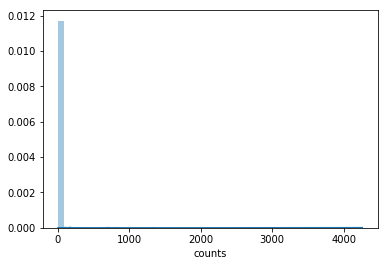

In [135]:
sns.distplot(unknown_vocab.counts)
plt.show()

In [136]:
exclude_words = {'airbnb', 'lyft','NYC', "airbnb'ers", "bnb", "nyc'", "airbnbs"}

In [137]:
exclude_vocab = unknown_vocab[(unknown_vocab.word.str.contains("'s")) | (unknown_vocab.word.str.contains("'d")) | (unknown_vocab.word.str.lower().isin(exclude_words))]




In [148]:
needs_correction = unknown_vocab[(unknown_vocab.counts > 5) & (~unknown_vocab.word.isin(exclude_vocab.word.unique()))]

In [149]:
len(needs_correction)

113

## Getting correction dictionary

In [153]:
spell_corrections = pd.read_csv("spell_correction_final.csv", index_col=0)

In [154]:
correction_dict = {r['word']:r['final_corrections'] for i, r in spell_corrections.iterrows()}
    

## Correct reviews

In [167]:
host_profiles_spell = []

In [175]:
host_profiles_spell = lang.spell_correct(correction_dict, lang_hosts, 'about')

In [176]:
host_profiles_spell[host_profiles_spell.isCorrected == 1].head(1)

,id,name,since,location,about,response_time,response_rate,is_superhost,neighbourhood,listings_count,...,verifications,has_profile_pic,identity_verified,calculated_listings_count,num_of_cancellations,google_langs,google_langs_conf,token_len,isTranslated,isCorrected
12,18946,Doti,27/05/2009,"New York, New York, United States","Raised in Europe and Asia I love to host international guests and to travel abroad being hosted as well. I have a home near Washington DC to which I often go and travelers are welcome to accompany me. I love to entertain and do so frequently. I also host many programs in my home. The eternal student I am always involved in learning something new. Currently a graduate student in psychology, art...",within an hour,100%,t,Chelsea,1,...,"['email', 'phone', 'reviews', 'kba']",t,t,1,1,en,1.0,82,0,1


In [182]:
guest_profiles_spell = lang.spell_correct(correction_dict, lang_guests, 'description')

In [183]:
guest_profiles_spell[guest_profiles_spell.isCorrected == 1].head(1)

,idGuest,id,name,city,ccode,membershipMonth,membershipYear,superhost,verified,description,...,languages,reviewNumber,guideNumber,wishListNumber,google_langs,google_langs_conf,token_len,descriptions,isTranslated,isCorrected
79,80,49669377,Anna Christina,"Quezon, Philippines",PH,November,2015,false,true,"Lawyer and lecturer by profession. Plan on travelling at least twice a year with my family until I am old and grey. An avid Star Wars and Paulo Coelho Fan. My husband and I are dog lovers and own four magnificent creatures: Walken The German Shepherd, Willis The Chow, Diesel The Husky, and Freeman The Rottie. Life is a great adventure and there is always something new to learn every single day...",...,English,3.0,0.0,2.0,en,1.0,78,"Lawyer and lecturer by profession. Plan on travelling at least twice a year with my family until I am old and grey. An avid Star Wars and Paulo Coelho Fan. My husband and I are dog lovers and own four magnificent creatures: Walken The German Shepherd, Willis The Chow, Diesel The Husky, and Freeman The Rottie. Life is a great adventure and there is always something new to learn every single day...",0,1


In [185]:
len(guest_profiles_spell)

96255

In [187]:
guest_profiles_spell.to_csv("guest_profile_spell.csv")
host_profiles_spell.to_csv("host_profile_spell.csv")

## Extra mischellaneous code

In [151]:
import http.client, urllib.parse, json
import time
def get_spell_correction(text):
    time.sleep(1)
    data = {'text': text}

    # NOTE: Replace this example key with a valid subscription key.
    key = 'e5dd4c2922114235a61ede29af8f8525'

    host = 'api.cognitive.microsoft.com'
    path = '/bing/v7.0/spellcheck?'
    params = 'mkt=en-us&mode=proof'

    headers = {'Ocp-Apim-Subscription-Key': key,
    'Content-Type': 'application/x-www-form-urlencoded'}

    conn = http.client.HTTPSConnection(host)
    body = urllib.parse.urlencode (data)
    conn.request ("POST", path + params, body, headers)
    response = conn.getresponse ()
    output = json.dumps(json.loads(response.read()), indent=4)
    
    suggestion = eval(output)['flaggedTokens'][0]['suggestions'][0] if ('flaggedTokens' in eval(output).keys()) and (len(eval(output)['flaggedTokens']) > 0) else None
    return (suggestion['suggestion'], suggestion['score']) if suggestion != None else None

In [2]:
guests = pd.read_csv(os.path.join('more_guests_ntrans.csv'), low_memory=False, index_col=0).drop_duplicates(subset="id", keep="last")

In [4]:
lang.split_get_google_languages_files(guests, 'description', 50)

In [18]:
new_trans = guests2[['id','google_langs', 'google_langs_conf']]

In [20]:
new_trans['updated_about'] = lang.get_english_text(guests2, 'description')

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
